Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Features loaded: (300, 768)
✅ Labels loaded: (300,)

✅ Cross-Age Generalization Accuracy: 91.67%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.67      1.00      0.80        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10

    accuracy                           0.92        60
   macro avg       0.94      0.92      0.92        60
weighted avg       0.94      0.92      0.92        60



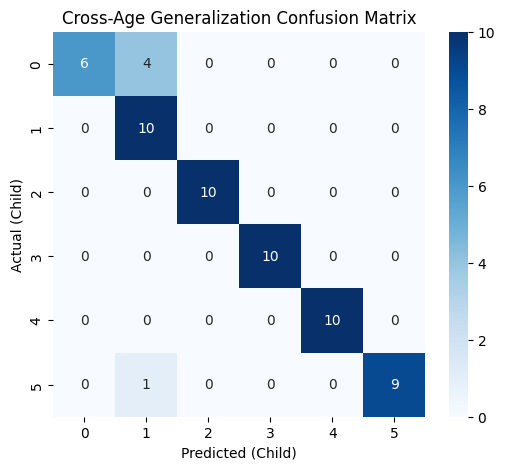

In [10]:
# ----------------------------------------------------------
# 📘 4A_Cross_Age_Generalization.ipynb
# Simulates training on adults and testing on children
# ----------------------------------------------------------

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load HuBERT features
X = np.load("/content/drive/MyDrive/hubert_features.npy")
y = np.load("/content/drive/MyDrive/hubert_labels.npy")

print("✅ Features loaded:", X.shape)
print("✅ Labels loaded:", y.shape)

# ----------------------------------------------------------
# Simulate 'adults' and 'children' groups
# ----------------------------------------------------------
# We'll just split data 80:20 (adults:children)
X_adults, X_children, y_adults, y_children = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize for fair training
scaler = StandardScaler()
X_adults_scaled = scaler.fit_transform(X_adults)
X_children_scaled = scaler.transform(X_children)

# Train RandomForest on adult data
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_adults_scaled, y_adults)

# Evaluate on child data
y_pred_child = model.predict(X_children_scaled)
acc = accuracy_score(y_children, y_pred_child)

print(f"\n✅ Cross-Age Generalization Accuracy: {acc*100:.2f}%\n")
print(classification_report(y_children, y_pred_child))

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(pd.crosstab(y_children, y_pred_child), annot=True, cmap="Blues", fmt="d")
plt.title("Cross-Age Generalization Confusion Matrix")
plt.xlabel("Predicted (Child)")
plt.ylabel("Actual (Child)")
plt.show()
